In [3]:
import matplotlib.pyplot as plt
import pandas as pd

# Load the dataset
file_path = '../dataset/cgt/valid_ast.csv'
df = pd.read_csv(file_path, sep=',')

Dataset: CodeSmells
  Unique fp_sol: 326
  Unique fp_sol2: 311
  Unique fp_bytecode: 326
  Unique fp_runtime: 299

Dataset: ContractFuzzer
  Unique fp_sol: 212
  Unique fp_sol2: 212
  Unique fp_bytecode: 167
  Unique fp_runtime: 209

Dataset: Doublade
  Unique fp_sol: 135
  Unique fp_sol2: 135
  Unique fp_bytecode: 112
  Unique fp_runtime: 111

Dataset: EthRacer
  Unique fp_sol: 60
  Unique fp_sol2: 60
  Unique fp_bytecode: 60
  Unique fp_runtime: 60

Dataset: EverEvolvingG
  Unique fp_sol: 190
  Unique fp_sol2: 190
  Unique fp_bytecode: 190
  Unique fp_runtime: 190

Dataset: JiuZhou
  Unique fp_sol: 127
  Unique fp_sol2: 125
  Unique fp_bytecode: 122
  Unique fp_runtime: 120

Dataset: NPChecker
  Unique fp_sol: 15
  Unique fp_sol2: 15
  Unique fp_bytecode: 15
  Unique fp_runtime: 15

Dataset: NotSoSmartC
  Unique fp_sol: 15
  Unique fp_sol2: 15
  Unique fp_bytecode: 4
  Unique fp_runtime: 4

Dataset: SBcurated
  Unique fp_sol: 66
  Unique fp_sol2: 66
  Unique fp_bytecode: 30
  Unique 

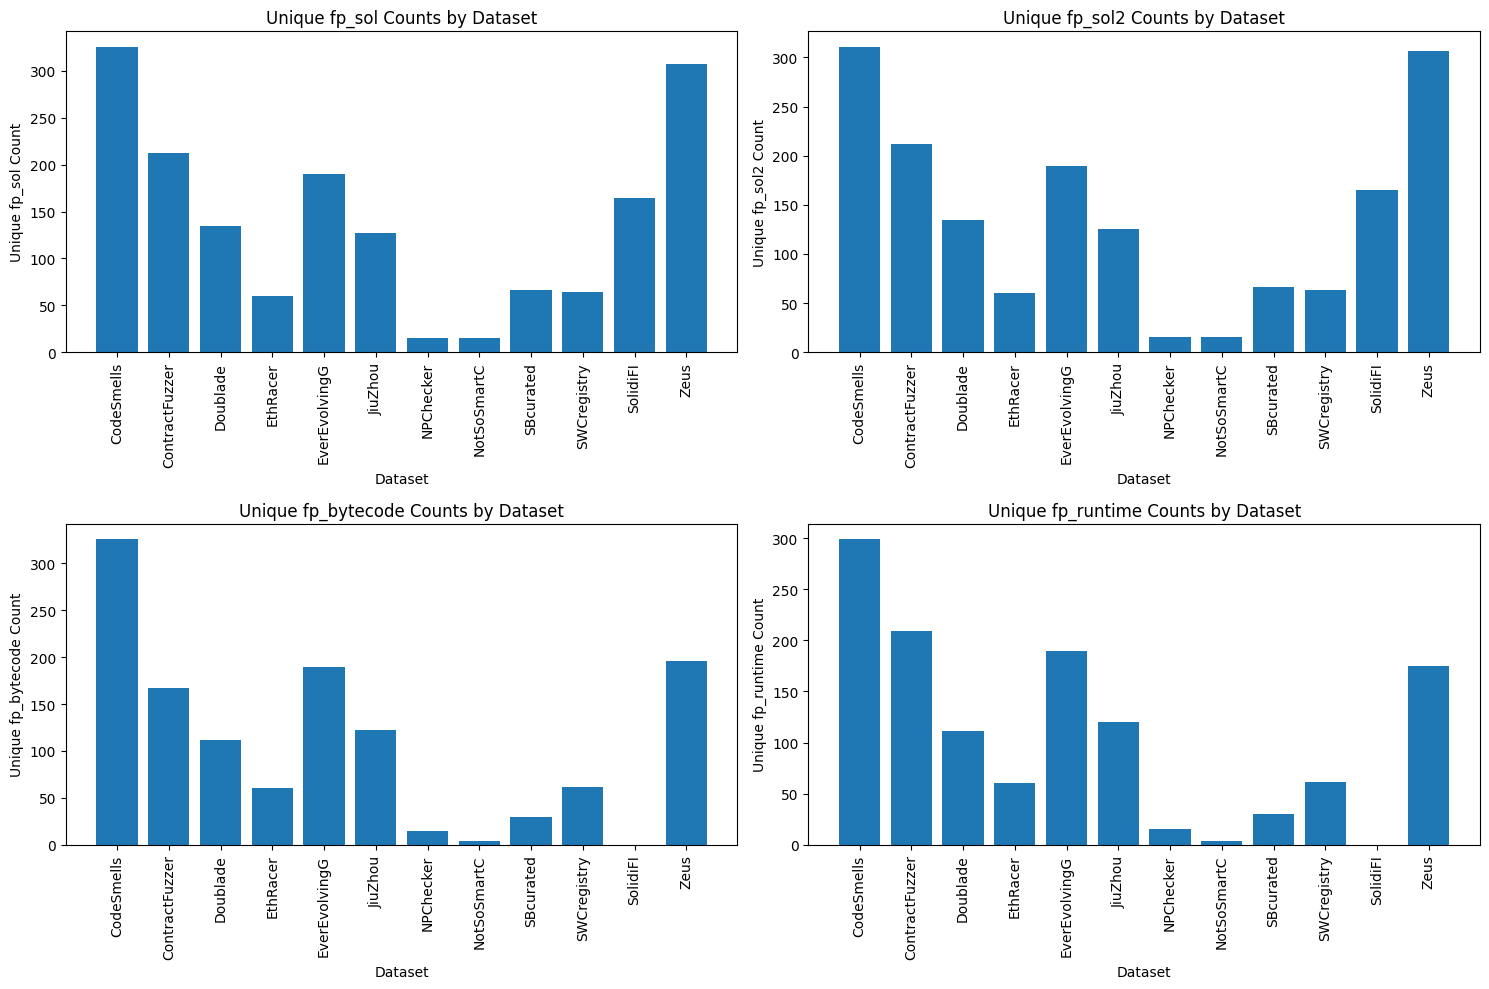

In [4]:
# Group by the 'dataset' column and calculate unique counts for 'fp_sol', 'fp_sol2', 'fp_bytecode', and 'fp_runtime'
grouped = df.groupby('dataset').agg({
    'fp_sol': pd.Series.nunique,
    'fp_sol2': pd.Series.nunique,
    'fp_bytecode': pd.Series.nunique,
    'fp_runtime': pd.Series.nunique
}).reset_index()

# Calculate the total unique counts across all datasets
totals = grouped[['fp_sol', 'fp_sol2', 'fp_bytecode', 'fp_runtime']].sum().to_frame().T
totals['dataset'] = 'Total'
totals = totals[['dataset', 'fp_sol', 'fp_sol2', 'fp_bytecode', 'fp_runtime']]

# Append the totals row to the grouped DataFrame
grouped = pd.concat([grouped, totals], ignore_index=True)

# Convert 'dataset' column to string type
grouped['dataset'] = grouped['dataset'].astype(str)

# Separate the total row from the rest of the data
grouped_no_total = grouped[grouped['dataset'] != 'Total']

# Print the results
for index, row in grouped.iterrows():
    dataset = row['dataset']
    unique_fp_sol = row['fp_sol']
    unique_fp_sol2 = row['fp_sol2']
    unique_fp_bytecode = row['fp_bytecode']
    unique_fp_runtime = row['fp_runtime']
    print(f"Dataset: {dataset}")
    print(f"  Unique fp_sol: {unique_fp_sol}")
    print(f"  Unique fp_sol2: {unique_fp_sol2}")
    print(f"  Unique fp_bytecode: {unique_fp_bytecode}")
    print(f"  Unique fp_runtime: {unique_fp_runtime}")
    print()

# Plot histograms excluding the 'Total' row
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

axs[0, 0].bar(grouped_no_total['dataset'], grouped_no_total['fp_sol'])
axs[0, 0].set_title('Unique fp_sol Counts by Dataset')
axs[0, 0].set_xlabel('Dataset')
axs[0, 0].set_ylabel('Unique fp_sol Count')
axs[0, 0].tick_params(axis='x', rotation=90)

axs[0, 1].bar(grouped_no_total['dataset'], grouped_no_total['fp_sol2'])
axs[0, 1].set_title('Unique fp_sol2 Counts by Dataset')
axs[0, 1].set_xlabel('Dataset')
axs[0, 1].set_ylabel('Unique fp_sol2 Count')
axs[0, 1].tick_params(axis='x', rotation=90)

axs[1, 0].bar(grouped_no_total['dataset'], grouped_no_total['fp_bytecode'])
axs[1, 0].set_title('Unique fp_bytecode Counts by Dataset')
axs[1, 0].set_xlabel('Dataset')
axs[1, 0].set_ylabel('Unique fp_bytecode Count')
axs[1, 0].tick_params(axis='x', rotation=90)

axs[1, 1].bar(grouped_no_total['dataset'], grouped_no_total['fp_runtime'])
axs[1, 1].set_title('Unique fp_runtime Counts by Dataset')
axs[1, 1].set_xlabel('Dataset')
axs[1, 1].set_ylabel('Unique fp_runtime Count')
axs[1, 1].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()

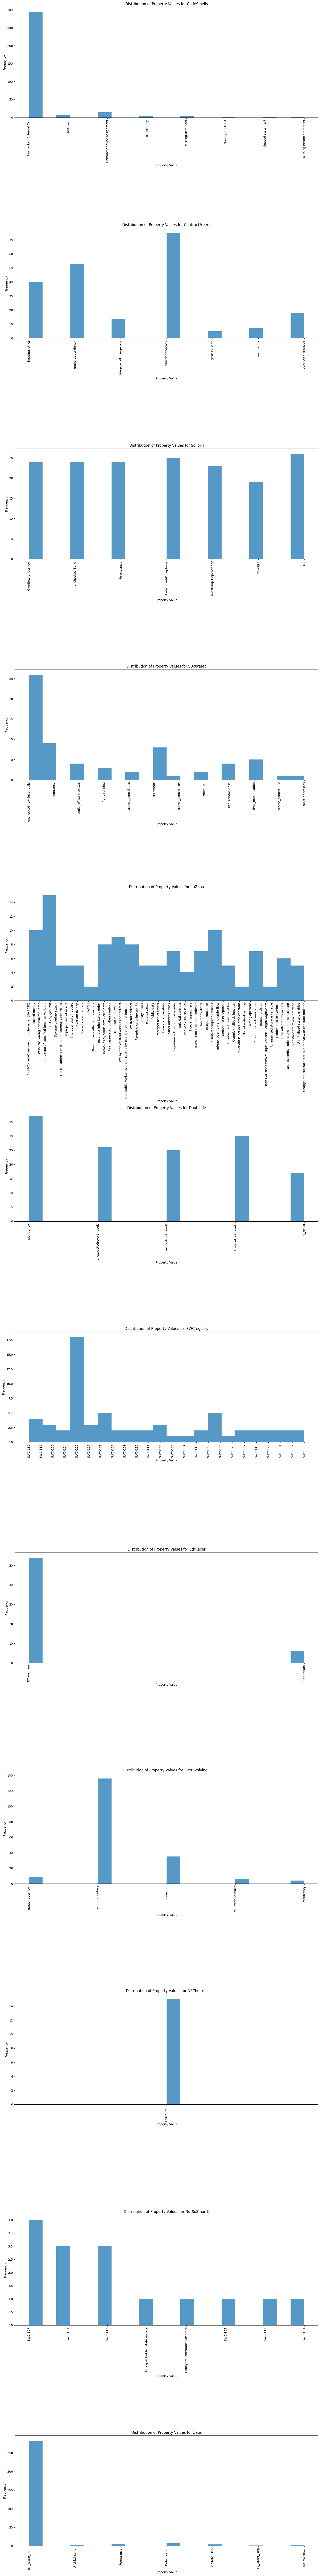

In [5]:
# Plot the distribution of the values of the column "property" for each dataset
property_values = df[['dataset', 'property']]
unique_datasets = property_values['dataset'].unique()

fig, axs = plt.subplots(len(unique_datasets), 1, figsize=(15, 10 * len(unique_datasets)))

for i, dataset in enumerate(unique_datasets):
    dataset_values = property_values[property_values['dataset'] == dataset]['property']
    axs[i].hist(dataset_values, bins=20, alpha=0.75)
    axs[i].set_title(f'Distribution of Property Values for {dataset}')
    axs[i].set_xlabel('Property Value')
    axs[i].set_ylabel('Frequency')
    axs[i].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()

Statistics for dataset: ContractFuzzer
       frequency
count   7.000000
mean   30.285714
std    26.480901
min     5.000000
25%    10.500000
50%    18.000000
75%    46.500000
max    75.000000
        property_combination  frequency
0          (timedependency,)         75
1        (numberdependency,)         53
2          (freezing_ether,)         40
3      (exception_disorder,)         18
4  (delegatecall_dangerous,)         14
5              (reentrancy,)          7
6            (gasless_send,)          5


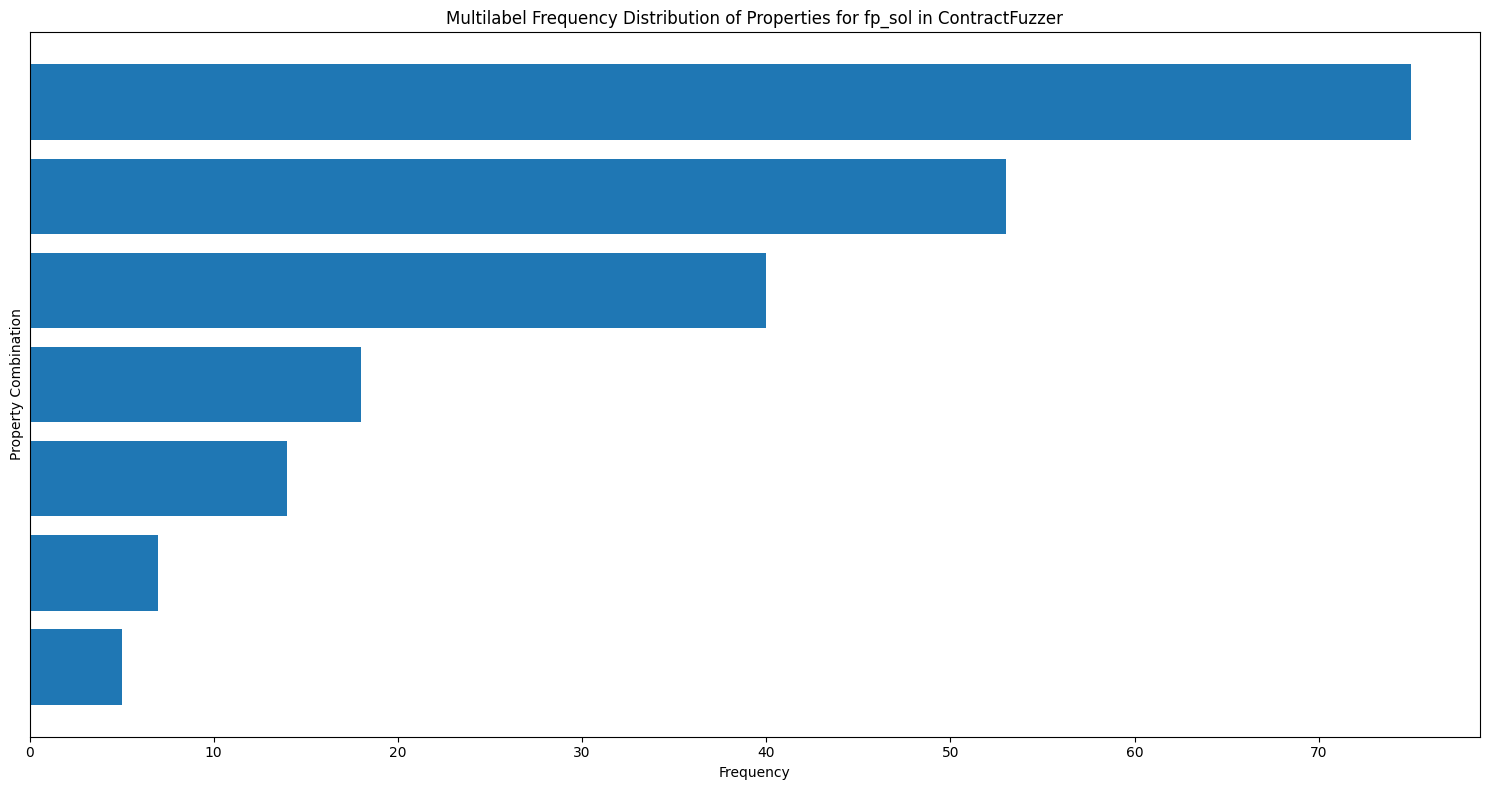

Statistics for dataset: SolidiFI
       frequency
count   7.000000
mean   23.571429
std     2.225395
min    19.000000
25%    23.500000
50%    24.000000
75%    24.500000
max    26.000000
      property_combination  frequency
0                   (TOD,)         26
1  (Unhandled-Exceptions,)         25
2    (Overflow-Underflow,)         24
3           (Re-entrancy,)         24
4        (Unchecked-Send,)         24
5  (Timestamp-Dependency,)         23
6             (tx.origin,)         19


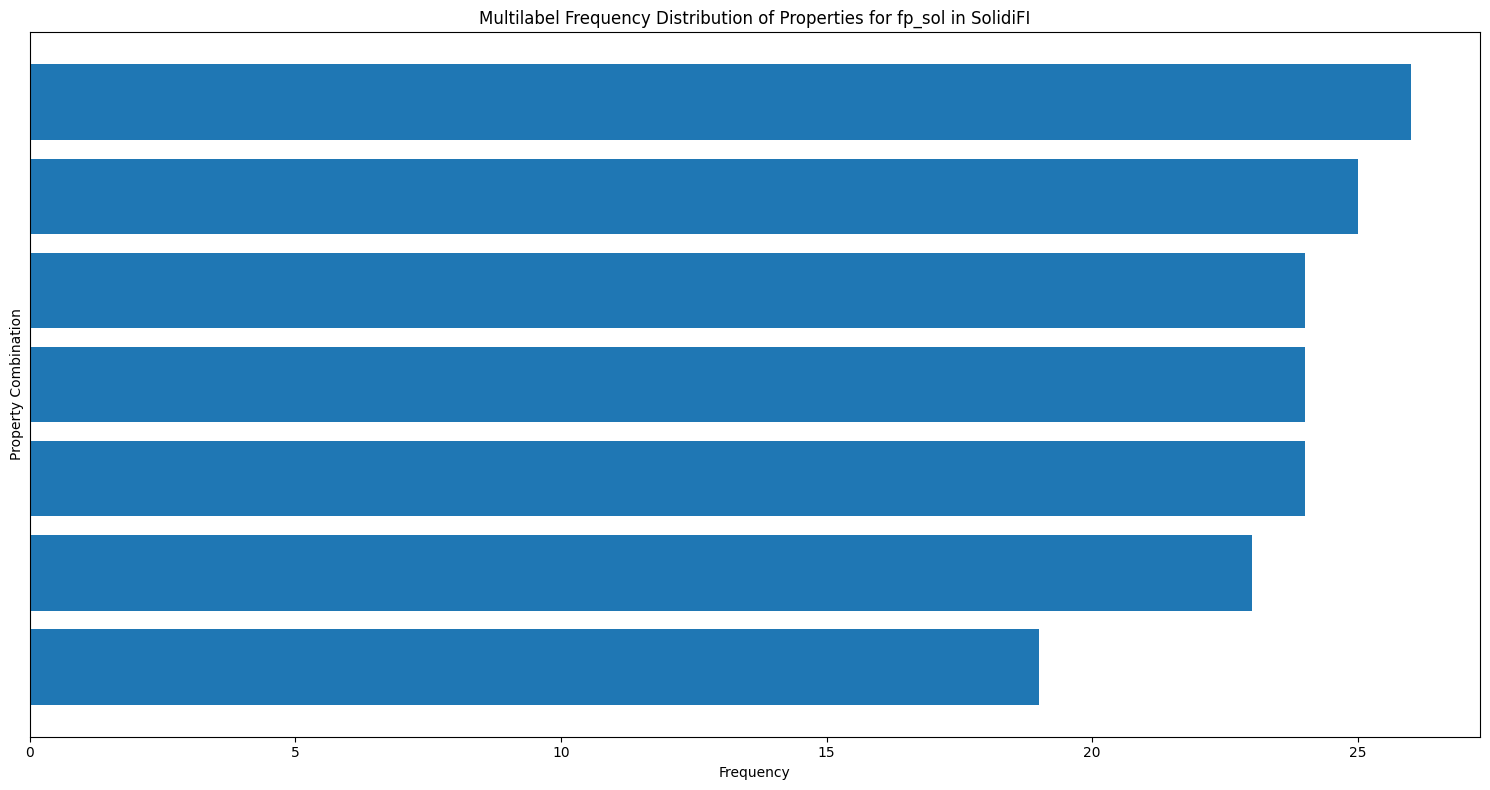

Statistics for dataset: SBcurated
       frequency
count  12.000000
mean    5.500000
std     6.973978
min     1.000000
25%     1.750000
50%     3.500000
75%     5.750000
max    26.000000
            property_combination  frequency
0   (unchecked_low_level_calls,)         26
1                  (reentrancy,)          9
2                  (arithmetic,)          8
3           (time_manipulation,)          5
4              (bad_randomness,)          4
5       (denial_of_service-128,)          4
6               (front_running,)          3
7                   (other-109,)          2
8          (access_control-118,)          2
9             (short_addresses,)          1
10         (access_control-112,)          1
11         (access_control-105,)          1


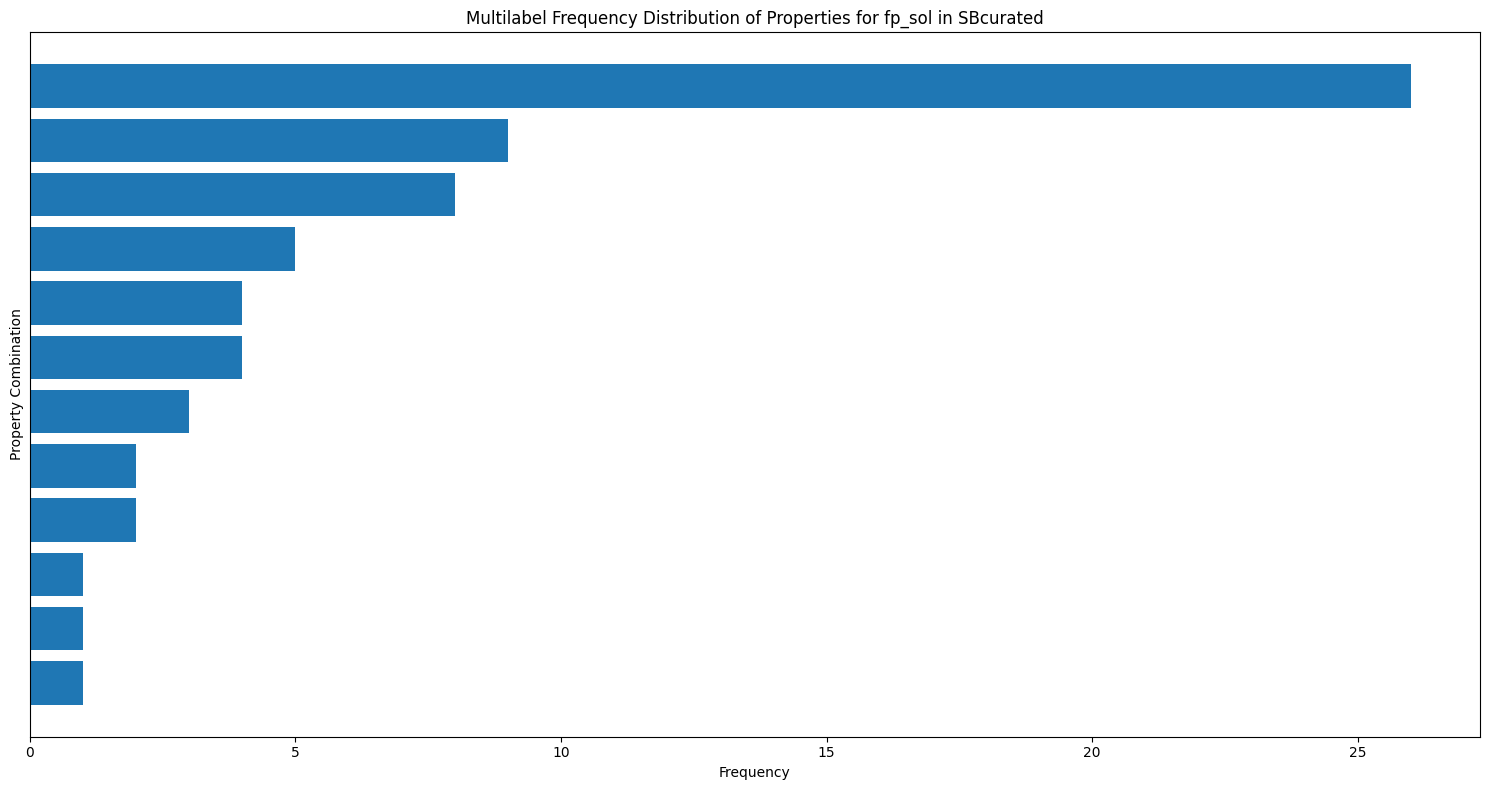

Statistics for dataset: JiuZhou
       frequency
count  39.000000
mean    1.256410
std     0.637344
min     1.000000
25%     1.000000
50%     1.000000
75%     1.000000
max     4.000000
                                 property_combination  frequency
0                                  (DOS by gaslimit,)          4
1          (DOS by non-existent address or contract,)          3
2                      (Unlimited compiler versions,)          2
3                   (integer overflow and underflow,)          2
4                 (Write the wrong constructor name,)          2
5                                    (Replay attack,)          2
6                      (Nonstandard token interface,)          2
7                          (Improper use of require,)          1
8                     (Transaction order dependence,)          1
9                    (Randomness affected by miners,)          1
10                         (Time affected by miners,)          1
11                               (W

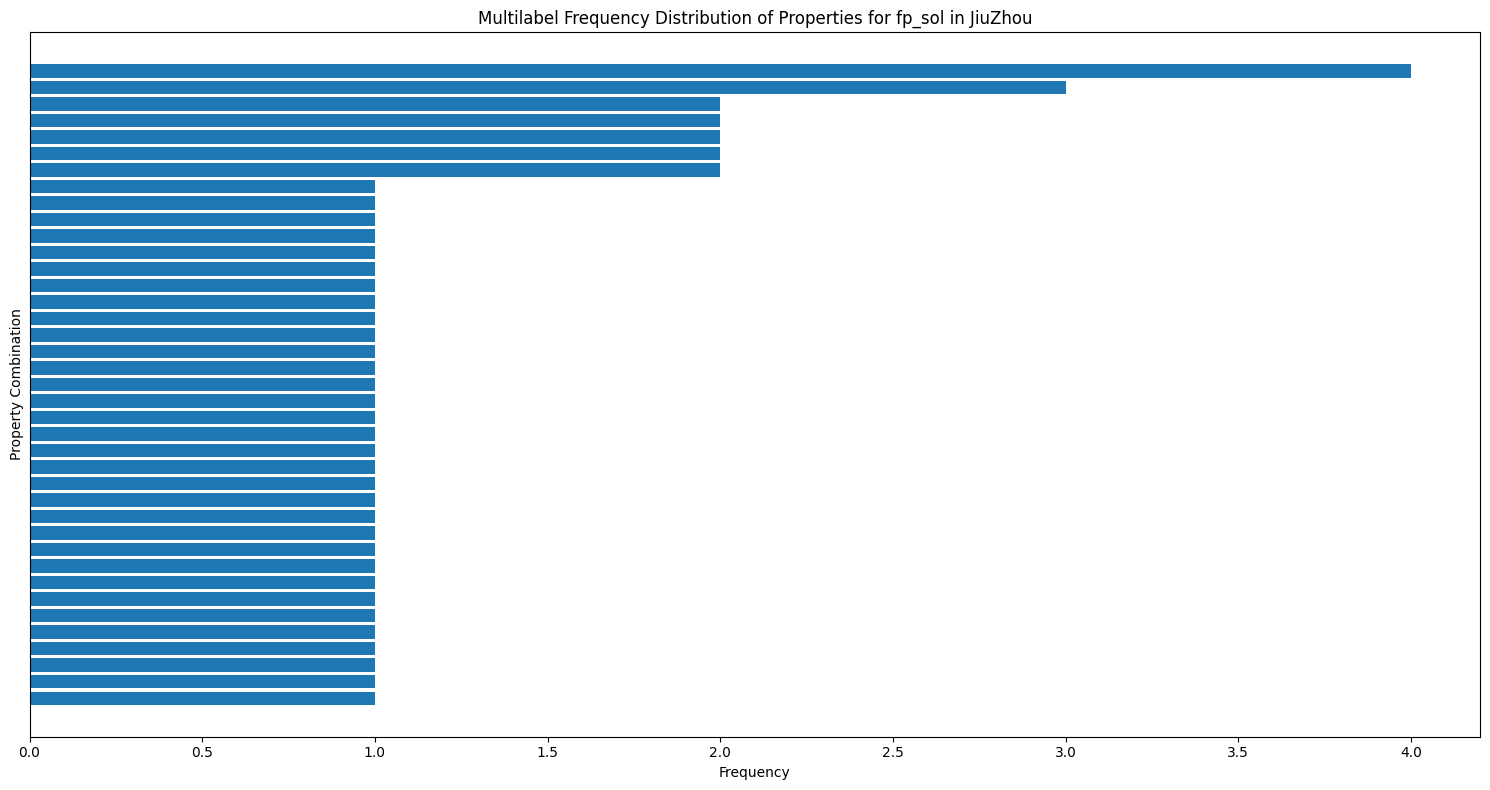

Statistics for dataset: Doublade
       frequency
count   5.000000
mean   13.200000
std    10.986355
min     4.000000
25%     4.000000
50%     9.000000
75%    20.000000
max    29.000000
         property_combination  frequency
0      (lowlevelcall_result,)         29
1  (unexpectedrevert_result,)         20
2               (reentrancy,)          9
3      (selfdestruct_result,)          4
4                (tx_result,)          4


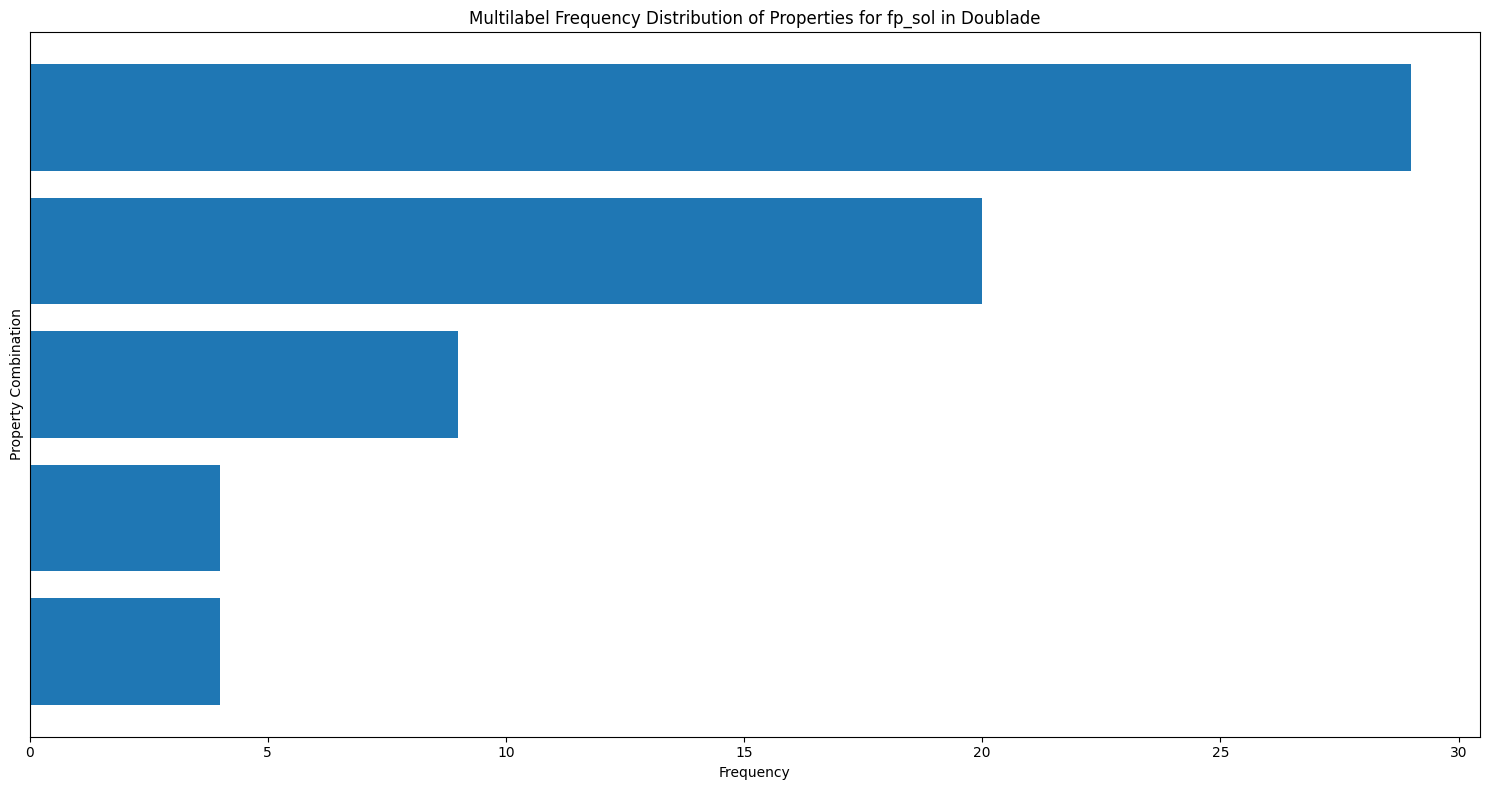

Statistics for dataset: CodeSmells
       frequency
count        1.0
mean         3.0
std          NaN
min          3.0
25%          3.0
50%          3.0
75%          3.0
max          3.0
         property_combination  frequency
0  (Unchecked External Call,)          3


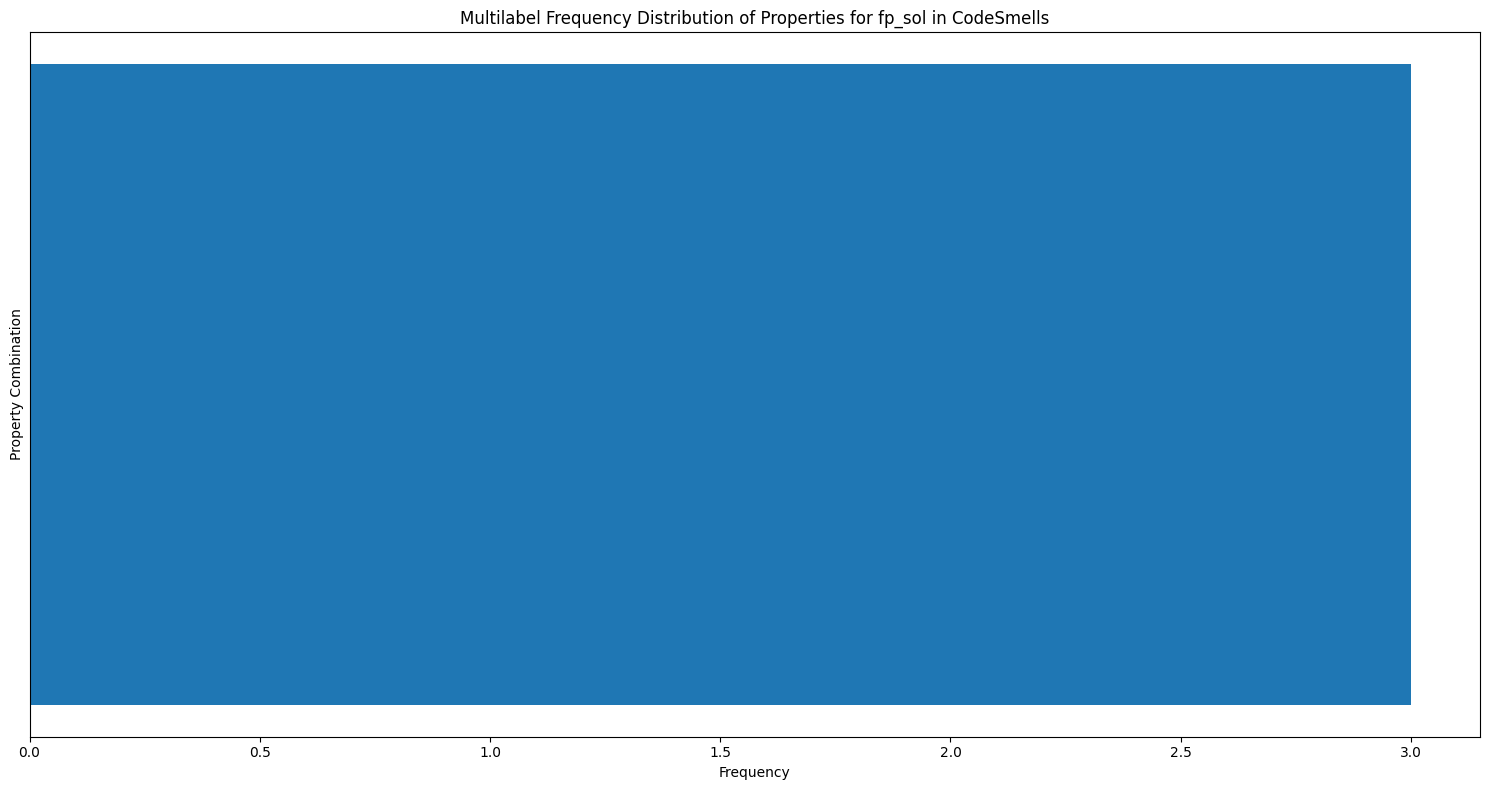

Statistics for dataset: SWCregistry
       frequency
count  20.000000
mean    1.950000
std     2.645254
min     1.000000
25%     1.000000
50%     1.000000
75%     2.000000
max    13.000000
   property_combination  frequency
0            (SWC-110,)         13
1            (SWC-116,)          2
2            (SWC-129,)          2
3            (SWC-106,)          2
4            (SWC-101,)          2
5            (SWC-119,)          2
6            (SWC-118,)          2
7            (SWC-103,)          2
8            (SWC-111,)          1
9            (SWC-105,)          1
10           (SWC-107,)          1
11           (SWC-124,)          1
12           (SWC-134,)          1
13           (SWC-136,)          1
14           (SWC-102,)          1
15           (SWC-127,)          1
16           (SWC-135,)          1
17           (SWC-130,)          1
18           (SWC-132,)          1
19           (SWC-131,)          1


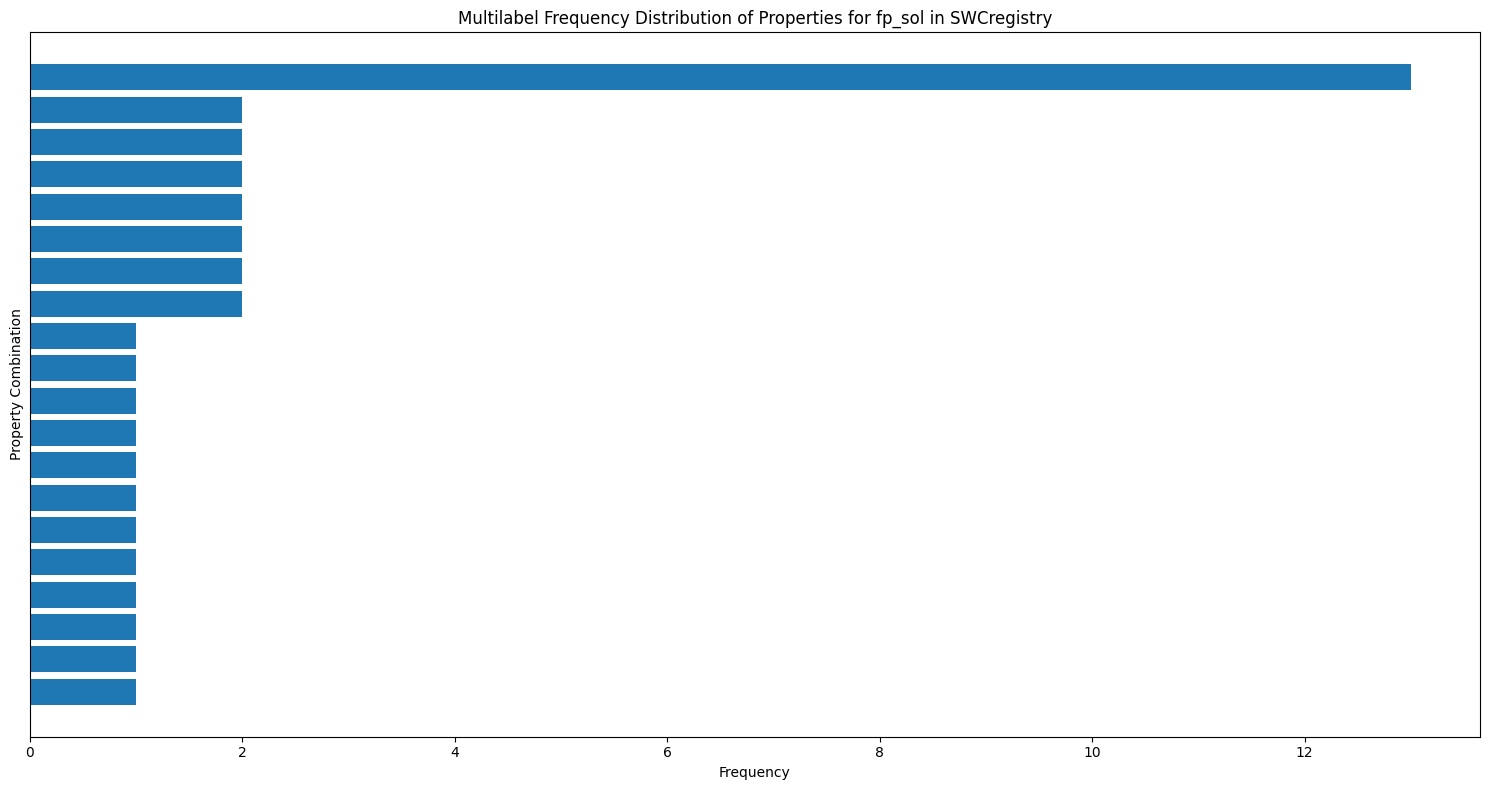

Statistics for dataset: EthRacer
       frequency
count   2.000000
mean   16.000000
std    16.970563
min     4.000000
25%    10.000000
50%    16.000000
75%    22.000000
max    28.000000
  property_combination  frequency
0        (EO onchain,)         28
1       (EO offchain,)          4


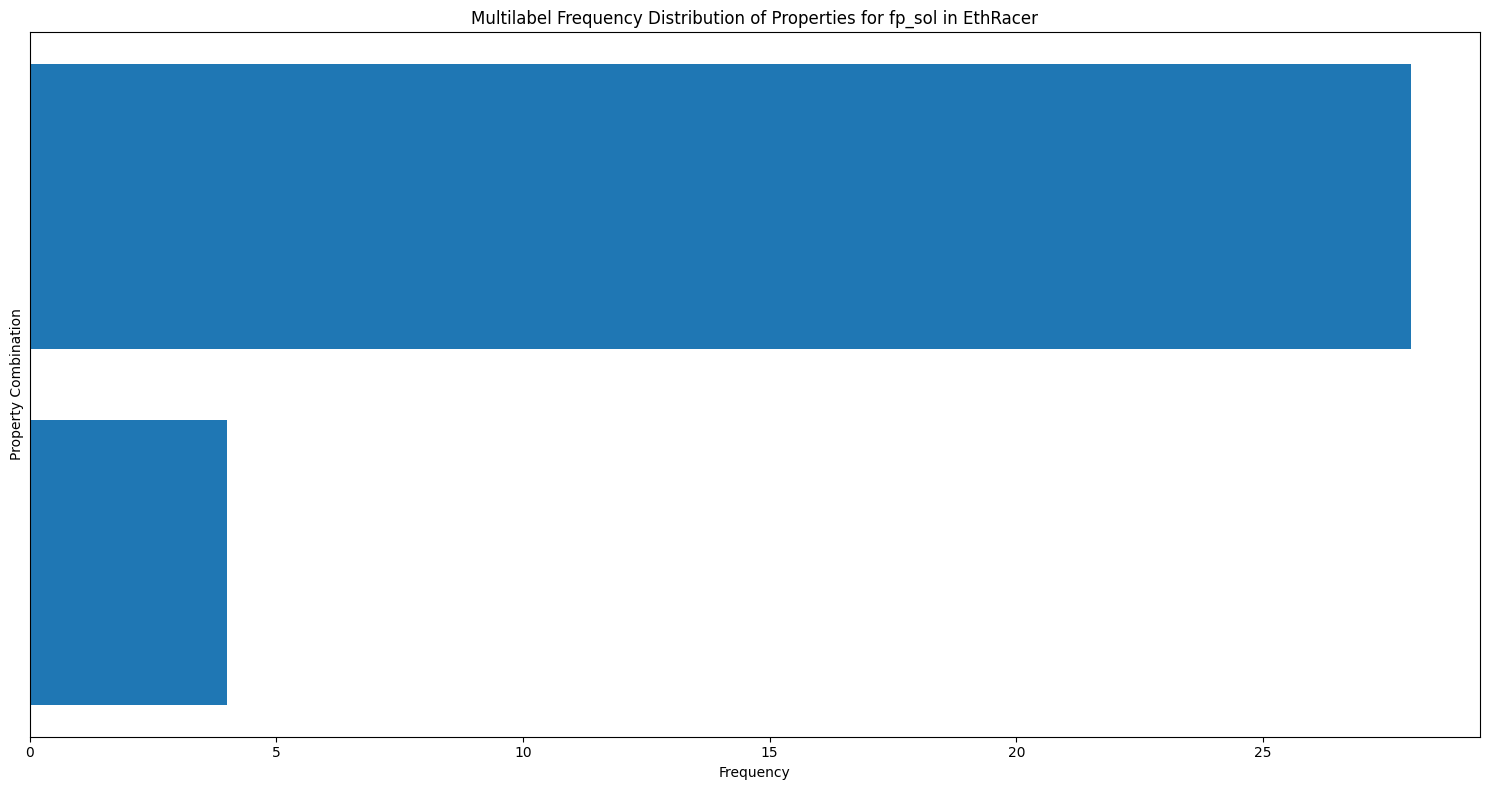

Statistics for dataset: EverEvolvingG
        frequency
count    5.000000
mean    38.000000
std     56.200534
min      4.000000
25%      6.000000
50%      9.000000
75%     35.000000
max    136.000000
     property_combination  frequency
0      (airdrop-hunting,)        136
1             (honeypot,)         35
2     (integer-overflow,)          9
3  (call-after-destruct,)          6
4           (reentrancy,)          4


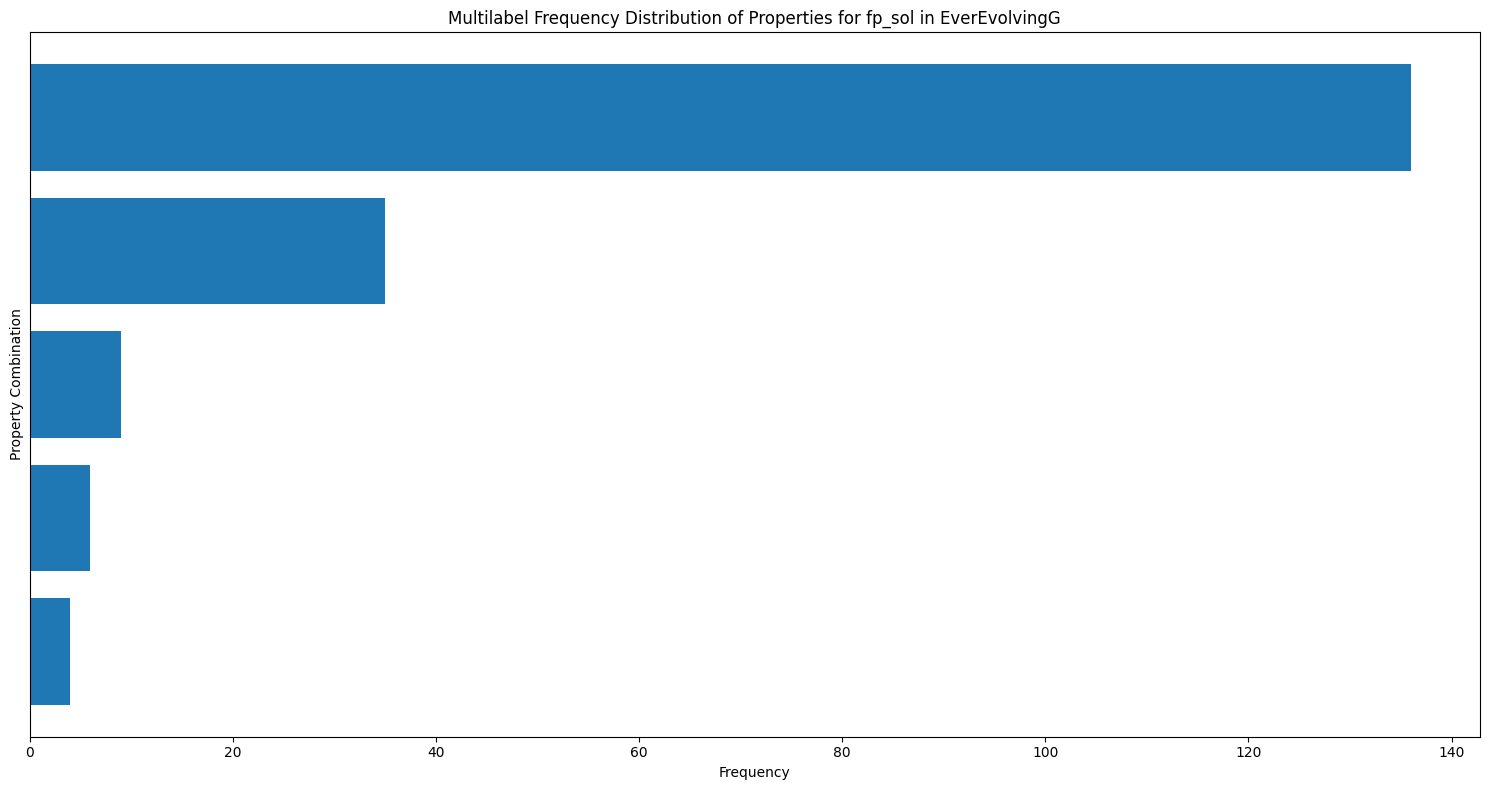

Statistics for dataset: NotSoSmartC
       frequency
count   7.000000
mean    1.285714
std     0.487950
min     1.000000
25%     1.000000
50%     1.000000
75%     1.500000
max     2.000000
               property_combination  frequency
0                        (SWC-107,)          2
1                        (SWC-124,)          2
2                        (SWC-118,)          1
3   (Honeypot Hidden state update,)          1
4  (Honeypot Inheritance disorder,)          1
5                        (SWC-104,)          1
6                        (SWC-113,)          1


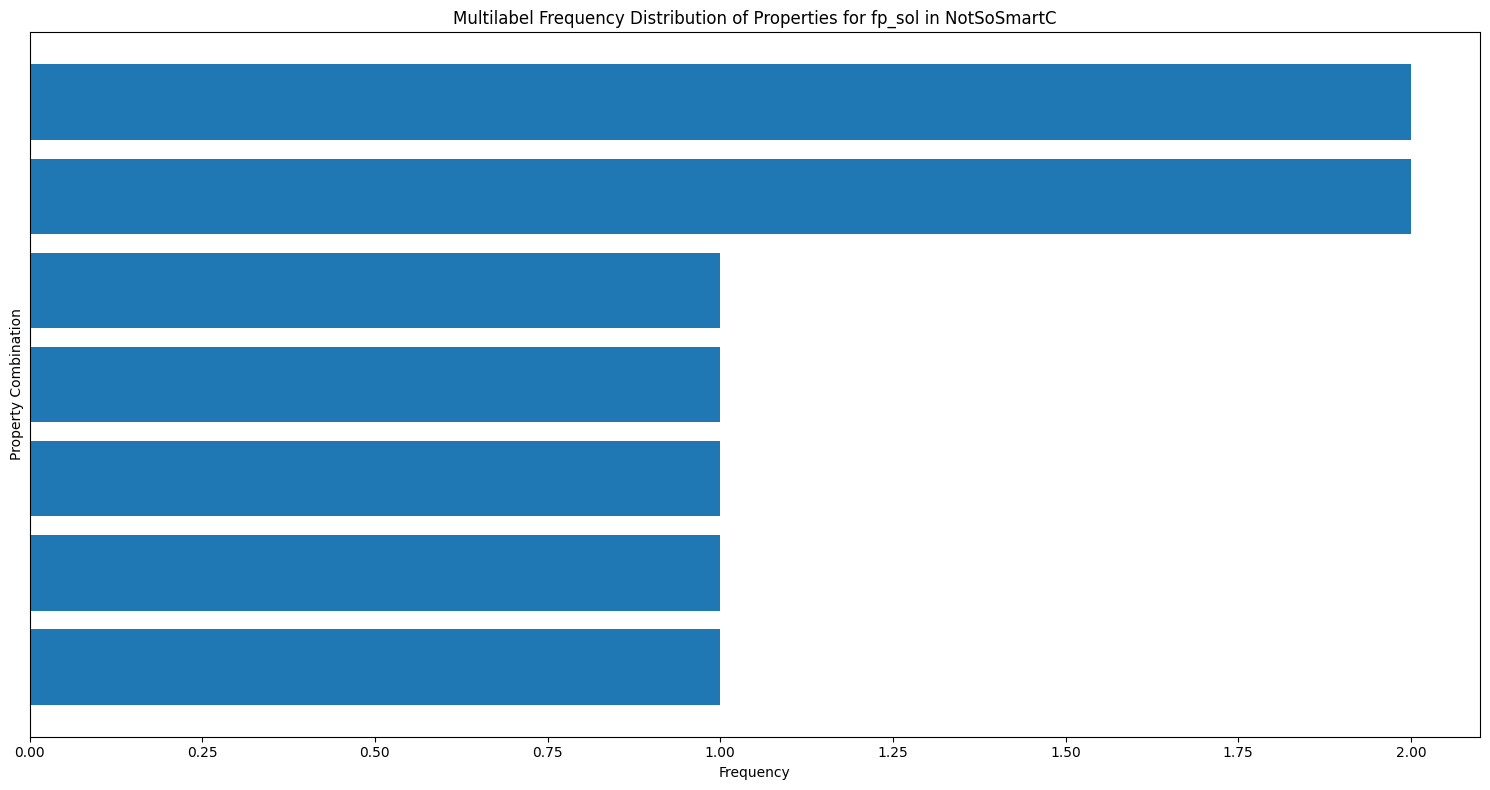

Statistics for dataset: Zeus
       frequency
count   4.000000
mean   13.000000
std    22.045408
min     1.000000
25%     1.000000
50%     2.500000
75%    14.500000
max    46.000000
  property_combination  frequency
0     (Blk_State_Dep,)         46
1       (Failed_send,)          4
2      (Int_overflow,)          1
3        (Reentrancy,)          1


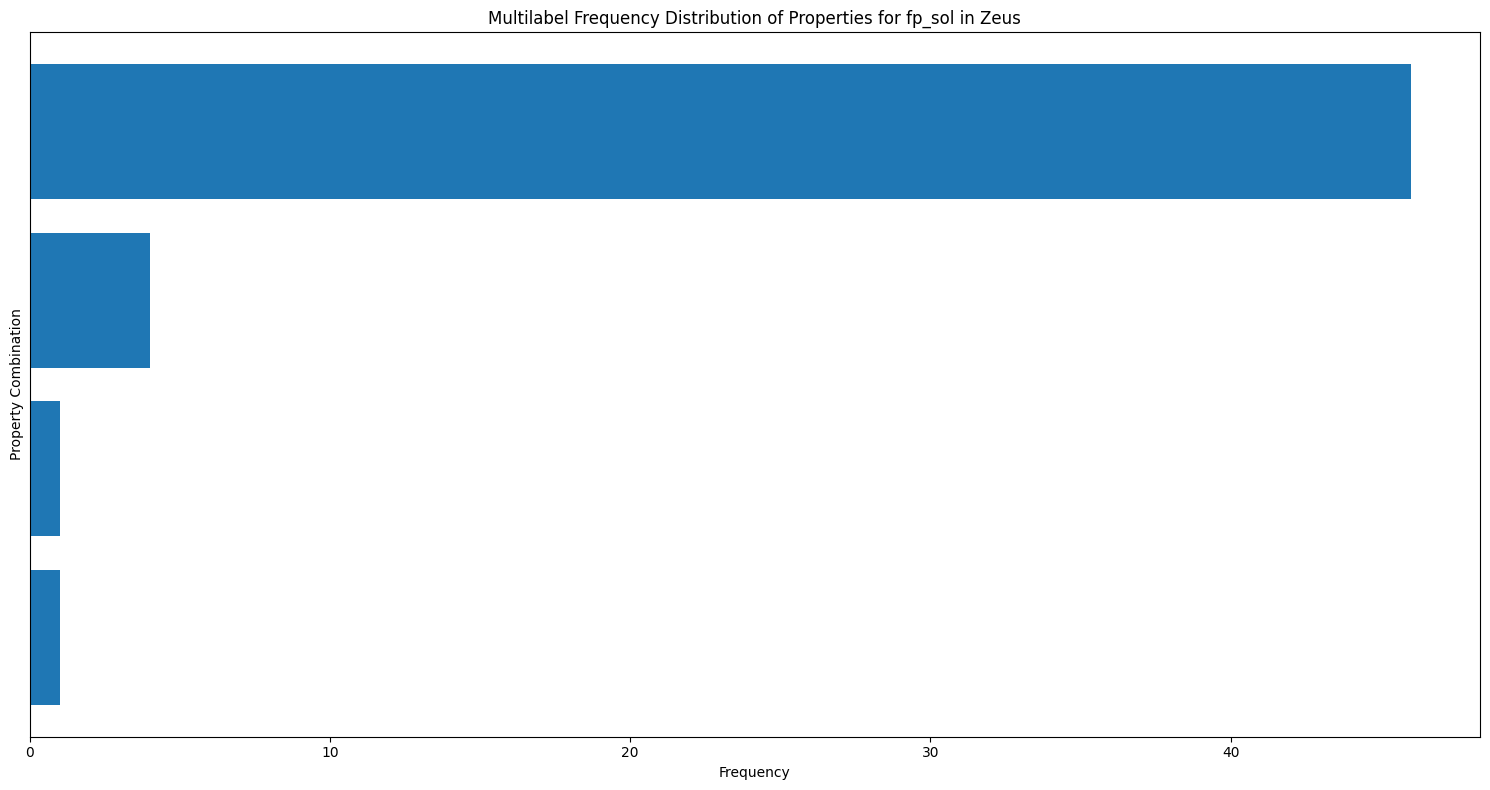

In [6]:
# Filter the dataset to include only rows where 'property_holds' equals True
df = df[df['property_holds'] == "t"]


# Function to plot multilabel frequency distribution for a given dataset
def plot_multilabel_distribution(data, dataset_name):
    # Group by 'fp_sol' and aggregate the 'property' values into a list
    property_combinations = data.groupby('fp_sol')['property'].apply(lambda x: tuple(sorted(set(x)))).reset_index()

    # Count the frequency of each unique combination of properties
    combination_counts = property_combinations['property'].value_counts().reset_index()
    combination_counts.columns = ['property_combination', 'frequency']

    # Print statistics
    print(f"Statistics for dataset: {dataset_name}")
    print(combination_counts.describe())
    print(combination_counts)

    # Plot the frequency of each combination
    plt.figure(figsize=(15, 8))
    plt.barh(combination_counts.index, combination_counts['frequency'])
    plt.xlabel('Frequency')
    plt.ylabel('Property Combination')
    plt.title(f'Multilabel Frequency Distribution of Properties for fp_sol in {dataset_name}')
    plt.gca().invert_yaxis()
    plt.yticks([])  # Hide y-axis labels
    plt.tight_layout()
    plt.show()


# Get the unique dataset names
unique_datasets = df['dataset'].unique()

# Loop through each dataset and create the plot
for dataset in unique_datasets:
    dataset_data = df[df['dataset'] == dataset]
    if not dataset_data.empty:  # Check if the dataset_data is not empty
        plot_multilabel_distribution(dataset_data, dataset)
    else:
        print(f"No data for dataset: {dataset}")
